# Prediction Model



In [1]:
# importing librairies ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# %matplotlib notebook

In [2]:
# The first step is to retrieve cleaned data 
df = pd.read_csv('./dataset/immo_collect_clean.csv', index_col = 0)

## Cleaning / manipulation 

First, I'm going to do a little data cleansing to make sure that it corresponds precisely to my expectations for this project.

In [3]:
print(df.shape)
df.head()

(23365, 15)


,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
5573,4000,85000,1,60,1,0,0,Liège,Liège,liege,4.0,wallonie,1.0,3.0,-2.830605
5574,6032,90000,1,60,1,0,1,Charleroi,Charleroi,hainaut,6.0,wallonie,1.0,21.0,-2.885534
5577,5300,99000,1,45,1,1,1,Andenne,Namur,namur,9.0,wallonie,1.0,1.0,-1.977659
5580,1080,87500,1,42,1,0,1,Molenbeek-Saint-Jean,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241
5581,1080,87500,1,42,1,0,1,Sint-Jans-Molenbeek,Bruxelles-Capitale,bruxelles-capitale,3.0,bruxelles-capitale,2.0,30.0,-3.036241


In [4]:
# I retrieve only utils columns for my model
df = df.iloc[:,0:7]
# df.drop(columns=['fully_equipped_kitchen'],inplace=True)

In [5]:
df.head()

,postal_code,price,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,85000,1,60,1,0,0
5574,6032,90000,1,60,1,0,1
5577,5300,99000,1,45,1,1,1
5580,1080,87500,1,42,1,0,1
5581,1080,87500,1,42,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23365 entries, 5573 to 48763
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   postal_code             23365 non-null  int64
 1   price                   23365 non-null  int64
 2   number_of_bedroom       23365 non-null  int64
 3   house_area              23365 non-null  int64
 4   fully_equipped_kitchen  23365 non-null  int64
 5   terrace                 23365 non-null  int64
 6   is_new                  23365 non-null  int64
dtypes: int64(7)
memory usage: 1.4 MB


## Let's train and predict for HOUSE !

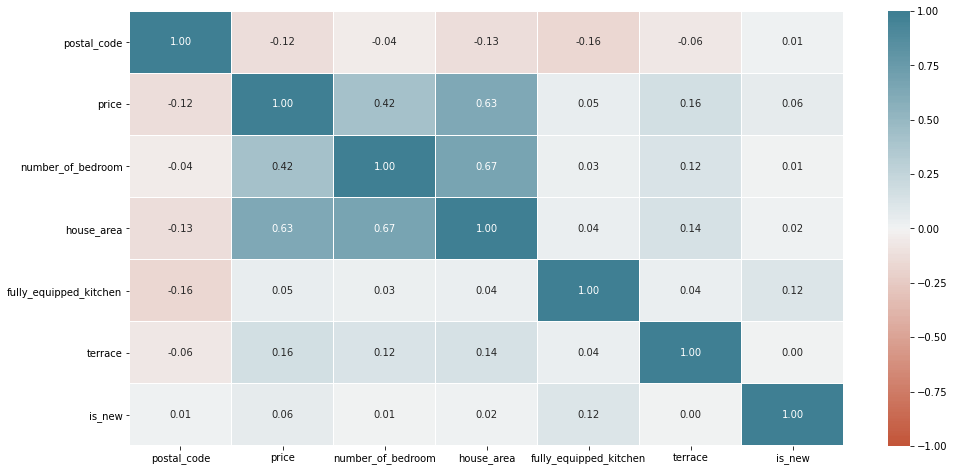

In [7]:
# Print the heatmap
plt.subplots(figsize=(16, 8))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [8]:
X = df.drop(columns=['price'])
X.head()

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
5573,4000,1,60,1,0,0
5574,6032,1,60,1,0,1
5577,5300,1,45,1,1,1
5580,1080,1,42,1,0,1
5581,1080,1,42,1,0,1


In [9]:
y = df[['price']]
y.head()

,price
5573,85000
5574,90000
5577,99000
5580,87500
5581,87500


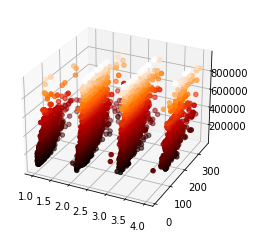

In [10]:
# %matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( X['number_of_bedroom'],X['house_area'], y, c=y, cmap='gist_heat')
ax.view_init(27, -64)

### Split the dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [12]:
X_test

,postal_code,number_of_bedroom,house_area,fully_equipped_kitchen,terrace,is_new
12799,1080,2,80,1,1,0
19622,4100,3,115,1,1,0
22278,8660,3,89,1,1,1
12783,4020,2,66,1,0,0
7015,1070,1,60,1,0,1
...,...,...,...,...,...,...
8723,1000,1,37,1,0,1
5996,4030,1,30,1,0,1
8702,1140,1,38,1,1,1
24538,9000,3,94,0,1,1


### Scaler

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Init a standard scaler
ss = StandardScaler()

# Scale the features
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Multiple Linear regression

In [14]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train) # Entrainement du model

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
score = regressor.score(X_train,y_train)
score

In [ ]:
score = regressor.score(X_test,y_test)
score

### 2. With polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 5

pipe=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
pipe.score(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)

### 3. KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)

### 4. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=20)
regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

### 5. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

In [ ]:
regr.score(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)

### 6.Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42, n_estimators=2000, learning_rate=0.02)
reg.fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

### 7. XGB

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=1000, learning_rate=0.02,
                            max_depth=9)
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_model.score(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
r2_score(y_test, y_pred)


### CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(learning_rate=0.02, depth=9, iterations=10000, random_seed=42, loss_function='RMSE', od_type='Iter')
fit_model = cbr_model.fit(X_train,
                          y_train,
                          eval_set=(X_test, y_test),
                          use_best_model=True,
                          early_stopping_rounds=10,
                          verbose=100)

print(fit_model.get_params())

In [ ]:
fit_model.score(X_test, y_test)

In [ ]:
y_pred = fit_model.predict(X_train)
r2_score(y_train, y_pred)

In [ ]:
y_pred = fit_model.predict(X_test)
r2_score(y_test, y_pred)

## Pickle it

In [ ]:
# import pickle
# tup = (xgb_model, ss)
# pickle.dump(tup, open("model_bin/apart_model.p", "wb" ))